In [22]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

In [23]:
from keras.datasets import mnist
(x,y), (X,Y) = mnist.load_data()

In [24]:
print(x.shape,y.shape)
print(X.shape,Y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [25]:
x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
random_nr = np.random.randint(0, 60000)

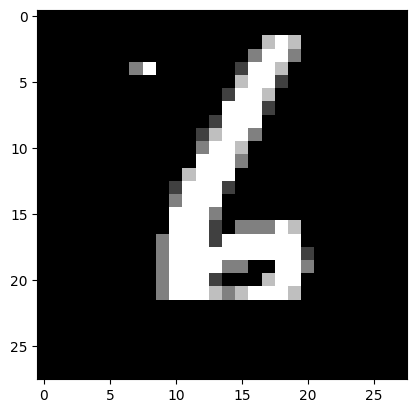

In [27]:
plt.imshow(x[random_nr], cmap="gray");

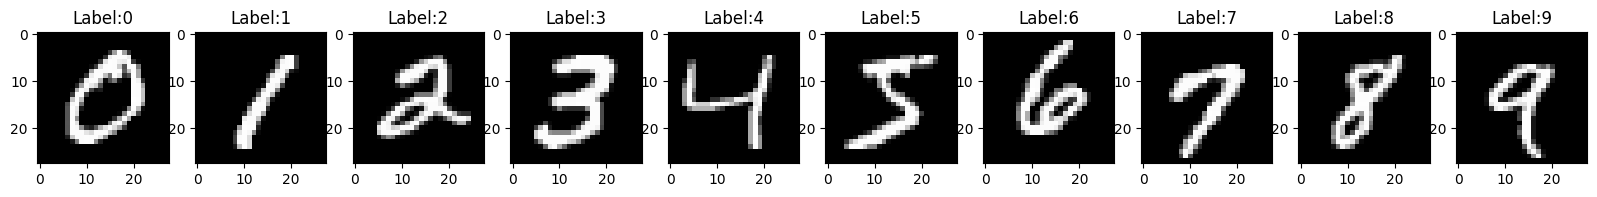

In [28]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
  sample = x[y == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [29]:
y = keras.utils.np_utils.to_categorical(y, num_classes)
Y = keras.utils.np_utils.to_categorical(Y, num_classes)

In [30]:
for i in range(10):
  print(y[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [31]:
x = x/255.0
X = X/255.0

In [32]:
x.shape

(60000, 28, 28)

In [33]:
x = x.reshape(x.shape[0], -1)
X = X.reshape(X.shape[0], -1)

In [34]:
x.shape

(60000, 784)

In [35]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [36]:
BATCH_SIZE = 512
epochs = 11
model.fit(x=x, y=y, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11
118/118 [==============================] - 2s 12ms/step - loss: 0.5756 - accuracy: 0.8335
Epoch 2/11
118/118 [==============================] - 1s 11ms/step - loss: 0.2195 - accuracy: 0.9360
Epoch 3/11
118/118 [==============================] - 2s 18ms/step - loss: 0.1616 - accuracy: 0.9526
Epoch 4/11
118/118 [==============================] - 2s 15ms/step - loss: 0.1274 - accuracy: 0.9623
Epoch 5/11
118/118 [==============================] - 1s 12ms/step - loss: 0.1073 - accuracy: 0.9684
Epoch 6/11
118/118 [==============================] - 1s 12ms/step - loss: 0.0909 - accuracy: 0.9726
Epoch 7/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0770 - accuracy: 0.9774
Epoch 8/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0677 - accuracy: 0.9801
Epoch 9/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0590 - accuracy: 0.9820
Epoch 10/11
118/118 [==============================] - 1s 11ms/step - loss: 0.0532 - accura

In [37]:
train_loss, train_accuracy = model.evaluate(x, y)
test_loss, test_accuracy = model.evaluate(X, Y)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9794
Train Loss: 0.031220102682709694, Train Accuracy: 0.9912999868392944
Test Loss: 0.07203845679759979, Test Accuracy: 0.9793999791145325


In [38]:
y_prediction = model.predict(X)
y_prediction_classes = np.argmax(y_prediction, axis=1)

print(f"What Softmax predicted: {y_prediction}")

print(f"What Softmax actually means: {y_prediction_classes}")

313/313 [==============================] - 1s 2ms/step
What Softmax predicted: [[1.1492632e-06 5.0206683e-07 1.7422215e-05 ... 9.9970078e-01
  6.7570403e-07 5.3562555e-05]
 [1.6120912e-07 1.0104742e-05 9.9997944e-01 ... 6.3909283e-08
  1.3182712e-07 6.7974043e-11]
 [2.7116468e-05 9.9496210e-01 3.9446121e-04 ... 3.6225647e-03
  3.3099455e-04 5.3582218e-05]
 ...
 [2.0204722e-11 4.6329811e-09 8.0892834e-11 ... 2.2390893e-06
  4.8333502e-09 1.4679463e-06]
 [1.5646638e-07 6.5317982e-09 6.7626040e-08 ... 2.3884456e-07
  1.1627102e-04 8.2127061e-09]
 [2.1603514e-08 7.8352646e-13 1.9391682e-09 ... 1.7536039e-13
  6.7235888e-08 6.7225362e-12]]
What Softmax actually means: [7 2 1 ... 4 5 6]


In [39]:
rand_num = np.random.choice(len(X))
X_sample = X[rand_num]

y_true = np.argmax(Y, axis=1)
y_sample_true = y_true[rand_num]

y_sample_prediction_class = y_prediction_classes[rand_num]

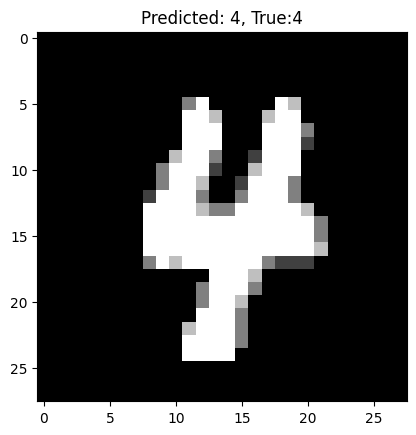

In [40]:
plt.title(f"Predicted: {y_sample_prediction_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");

In [41]:
confusion_mtx = confusion_matrix(y_true, y_prediction_classes)
print(confusion_mtx)

[[ 970    0    1    2    1    1    2    1    2    0]
 [   0 1121    4    0    0    0    4    1    5    0]
 [   8    0 1008    0    1    0    4    3    8    0]
 [   0    0    4  994    0    2    0    3    6    1]
 [   1    0    4    0  962    0    4    2    1    8]
 [   2    0    0    7    2  860    9    0    8    4]
 [   2    3    0    0    2    2  946    0    3    0]
 [   2    2    8    6    0    0    0 1002    1    7]
 [   4    0    3    4    0    2    2    2  954    3]
 [   4    3    1    6    8    3    0    3    4  977]]
